In [75]:
import os
import json
from gensim 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

def load_tags(table_fname):
    content = None
    with open(table_fname, encoding='utf-8') as f:
        content = json.load(f)
    return content

def remove_tags(text, flags):
    for k, v in flags.items():
        text = text.replace(k, v)
    return text

def load_text(file_list):
    contents = []
    for fname in file_list:
        with open('texts/' + fname) as f:
            text = f.read()
            contents.append(text)
    return contents

In [76]:
file_list = os.listdir('texts')
contents = load_text(file_list)
flags = load_tags('table.tbl.json')
for i in range(len(contents)):
    contents[i] = remove_tags(contents[i], flags)
    contents[i] = gensim.utils.simple_preprocess(contents[i])

In [89]:
# build vocabulary and train model
    model = gensim.models.Word2Vec(
        contents,
        size=100,
        window=10,
        min_count=3,
        workers=10)
    model.train(contents, total_examples=len(contents), epochs=10)

(1185000, 1570790)

In [90]:
X = model[model.wv.vocab]

c:\users\ignit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [91]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

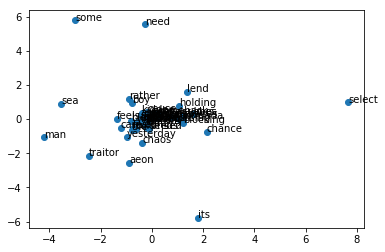

In [92]:
choices = random.sample(list(range(len(result))), 50)

plt.scatter(result[choices, 0], result[choices, 1])
words = list(model.wv.vocab)
for i in choices:
    plt.annotate(words[i], xy=(result[i, 0], result[i, 1]))
plt.show()

In [100]:
w1 = 'aeon'
model.wv.most_similar(positive=w1, topn=10)

[('summoning', 0.8596299290657043),
 ('yunalesca', 0.8240699172019958),
 ('truly', 0.771030068397522),
 ('die', 0.7497608661651611),
 ('reborn', 0.7454723119735718),
 ('death', 0.7434200048446655),
 ('final', 0.7162397503852844),
 ('fayth', 0.7110801339149475),
 ('sorrow', 0.7054100036621094),
 ('dead', 0.7018811106681824)]